## Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

arr_del15 = Arrival Delay Indicator, 15 Minutes or More (1=Yes)
arr_delay = Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

In [157]:
planDelay_df = pd.read_csv('135519184_52018_1924_airline_delay_causes.csv').dropna()
planDelay_df['carrier_ct'] = planDelay_df['carrier_ct'].astype(float)

In [158]:
labels = planDelay_df.columns[:]
labels

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [159]:
planDelay_df2 = planDelay_df[planDelay_df[' arr_delay'] >= 30.0]
planDelay_df2 = planDelay_df2[planDelay_df2['carrier_ct'] > 0]
planDelay_df2 = planDelay_df2[planDelay_df2[' weather_ct'] > 0]
planDelay_df2 = planDelay_df2[planDelay_df2['nas_ct'] > 0]
planDelay_df2 = planDelay_df2[planDelay_df2['late_aircraft_ct'] > 0]
planDelay_df2 = planDelay_df2[planDelay_df2['late_aircraft_delay'] > 0]

In [160]:
planDelay_df2['arr_flights'] = planDelay_df2['arr_flights']**(1/4)
planDelay_df2['arr_del15'] = planDelay_df2['arr_del15']**(1/4)
planDelay_df2['carrier_ct'] = planDelay_df2['carrier_ct']**(1/4)
planDelay_df2[' carrier_delay'] = planDelay_df2[' carrier_delay']**(1/3)
planDelay_df2[' weather_ct'] = planDelay_df2[' weather_ct']**(1/6)
planDelay_df2['nas_ct'] = planDelay_df2['nas_ct']**(1/6)
planDelay_df2['late_aircraft_ct'] = planDelay_df2['late_aircraft_ct']**(1/6)
planDelay_df2['nas_delay'] = planDelay_df2['nas_delay']**(1/6)
planDelay_df2['late_aircraft_delay'] = planDelay_df2['late_aircraft_delay']**(1/6)


planDelay_df2['arr_delay'] = np.log(planDelay_df2[' arr_delay'])
planDelay_df2 = planDelay_df2.drop(' arr_delay', 1)


In [137]:
planDelay_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000,240496.000000
mean,2010.041705,6.470012,403.296616,79.364642,22.276744,2.825871,26.754923,0.186772,27.320394,6.862085,0.914473,4440.352210,1302.134979,225.198024,1212.781693,7.174668,1693.062038
std,4.263088,3.451784,1064.657805,211.042582,48.224416,10.782851,92.600259,0.875637,80.032214,28.616157,4.088329,12927.682256,3414.658833,877.436871,5015.215634,36.959888,5091.180759
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2006.000000,3.000000,62.000000,11.000000,3.880000,0.000000,2.180000,0.000000,2.000000,0.000000,0.000000,529.000000,182.000000,0.000000,75.000000,0.000000,102.000000
50%,2010.000000,6.000000,134.000000,26.000000,9.440000,0.690000,6.600000,0.000000,6.860000,1.000000,0.000000,1350.000000,486.000000,30.000000,242.000000,0.000000,403.000000
75%,2014.000000,9.000000,292.000000,62.000000,21.330000,2.230000,17.430000,0.000000,18.960000,5.000000,1.000000,3309.000000,1153.000000,170.000000,679.000000,0.000000,1206.000000
max,2018.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,1969.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3119.000000,148181.000000


In [138]:
planDelay_df2.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
count,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140885.000000,140884.000000,140885.000000,140885.000000,140885.000000
mean,2009.883004,6.364638,4.148289,2.801625,2.081515,1.123998,1.573374,0.284195,42.345145,10.658473,1.390695,10.242203,373.918075,2.909459,10.891053,2630.197416,7.898525
std,4.275753,3.434661,1.409800,0.931742,0.640112,0.263489,0.397911,1.106893,101.231939,36.755125,5.238650,4.712145,1120.560105,0.775736,46.622182,6440.812430,1.235676
min,2003.000000,1.000000,1.316074,1.000000,0.316228,0.464159,0.464159,0.000000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.401197
25%,2006.000000,3.000000,3.245867,2.189939,1.656528,0.973277,1.313693,0.000000,5.110000,0.000000,0.000000,7.198405,41.000000,2.406026,0.000000,293.000000,7.055313
50%,2009.000000,6.000000,3.793085,2.590020,1.981944,1.094598,1.510129,0.000000,12.480000,3.000000,0.000000,9.348473,119.000000,2.778388,0.000000,773.000000,7.788212
75%,2013.000000,9.000000,4.608336,3.154342,2.382122,1.262012,1.753608,0.000000,31.500000,8.000000,1.000000,12.071334,323.000000,3.246118,0.000000,2051.000000,8.597297
max,2018.000000,12.000000,12.175649,8.936225,6.506370,2.992366,3.999230,80.560000,1885.470000,1969.000000,256.000000,58.180965,57707.000000,7.874624,3119.000000,148181.000000,12.980078


In [139]:
planDelay_df2

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",4.185859,2.735565,1.957409,1.486518,...,1.48,9.96,1.0,1.0,7.989570,621.0,2.962496,25.0,698.0,7.835975
1,2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",3.080070,2.279507,1.631780,1.122462,...,0.00,7.16,0.0,0.0,6.471274,83.0,2.888657,0.0,455.0,7.237059
2,2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5.236661,3.692991,2.414559,1.740709,...,1.90,17.53,5.0,0.0,11.098293,1722.0,3.953245,139.0,1269.0,9.025696
3,2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",5.386765,3.631929,2.785937,1.654881,...,4.69,40.75,9.0,1.0,14.486313,1032.0,3.498963,115.0,2322.0,9.029298
4,2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",4.423843,2.723270,1.964701,1.439836,...,0.00,16.61,0.0,0.0,9.340839,574.0,2.866699,0.0,1193.0,8.051022
5,2003,6,AA,American Airlines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",3.071479,1.861210,1.292412,1.139569,...,1.00,3.82,0.0,0.0,4.546836,90.0,1.919383,35.0,404.0,6.511745
6,2003,6,AA,American Airlines Inc.,BNA,"Nashville, TN: Nashville International",4.592932,3.009217,2.245842,1.512665,...,0.03,26.65,2.0,0.0,10.676532,913.0,3.046831,1.0,1732.0,8.447414
7,2003,6,AA,American Airlines Inc.,BOS,"Boston, MA: Logan International",5.964972,3.872983,2.886601,1.694347,...,2.25,45.73,7.0,0.0,16.135567,1783.0,3.811702,45.0,3043.0,9.404179
8,2003,6,AA,American Airlines Inc.,BUR,"Burbank, CA: Bob Hope",3.302834,2.279507,1.654324,1.291939,...,0.00,7.04,1.0,0.0,6.882389,191.0,2.565316,0.0,385.0,7.079184
9,2003,6,AA,American Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",4.934733,3.170154,2.047063,1.654209,...,0.00,24.69,1.0,1.0,10.189712,1332.0,3.457387,0.0,1600.0,8.647871


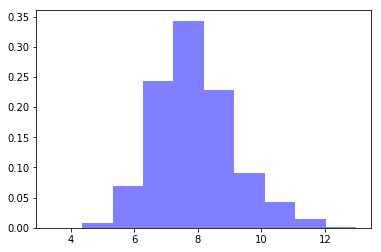

In [161]:
#Check the disribution of the outcome variable, which needs to be normal
num_bins = 10
plt.hist(planDelay_df2['arr_delay'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

0.638727393059


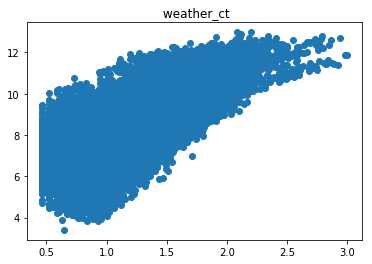

0.37386772203


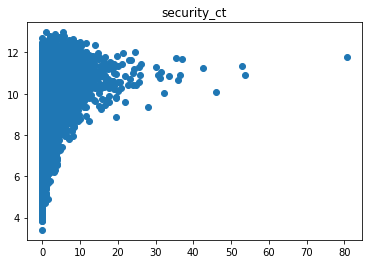

0.467407960659


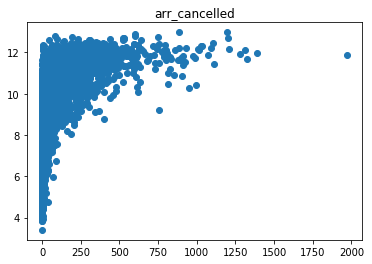

0.427629545601


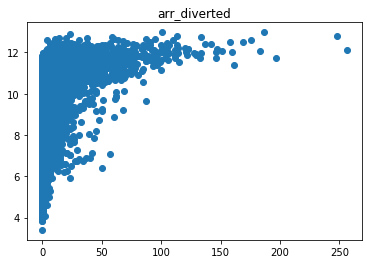

0.452282607238


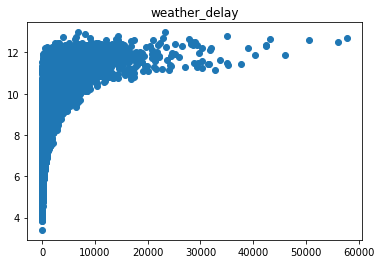

0.339718372608


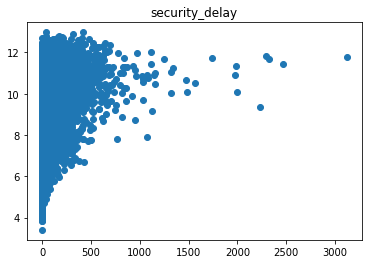

In [151]:
labels = X.columns[:]
labels = labels.drop(['arr_flights', 'arr_del15', 'carrier_ct', 'nas_ct', 'late_aircraft_ct', ' carrier_delay', 'nas_delay', 'late_aircraft_delay'])
#labels = labels.drop([' weather_ct', 'late_aircraft_ct' ])
for x in labels:
    x_axis = (planDelay_df2[x])
    print((x_axis).corr(planDelay_df2['arr_delay']))
    plt.plot(x_axis, planDelay_df2['arr_delay'], 'o')
    plt.title(x)
    plt.show()

In [15]:
df_num_corr = X.corr()[' arr_delay'][11:] # -1 because the latest row is SalePrice
#golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(by=0, ascending=False)
#print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

KeyError: ' arr_delay'

In [162]:
planDelay_df2 = planDelay_df2.drop(['security_ct', 'arr_cancelled', 'arr_diverted', 'weather_delay', 'security_delay'], 1)
planDelay_df2.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,carrier_delay,nas_delay,late_aircraft_delay,arr_delay
0,2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",4.185859,2.735565,1.957409,1.486518,1.634811,1.466819,7.989570,2.962496,2.978351,7.835975
1,2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",3.080070,2.279507,1.631780,1.122462,1.485598,1.388307,6.471274,2.888657,2.773332,7.237059
2,2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5.236661,3.692991,2.414559,1.740709,2.171197,1.611747,11.098293,3.953245,3.290361,9.025696
3,2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",5.386765,3.631929,2.785937,1.654881,1.904910,1.855046,14.486313,3.498963,3.638958,9.029298
4,2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",4.423843,2.723270,1.964701,1.439836,1.562823,1.597331,9.340839,2.866699,3.256667,8.051022


In [172]:
planDelay_df2 = planDelay_df2.dropna()
planDelay_target = pd.DataFrame()
X = planDelay_df2.drop([' month', 'year', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_delay'], 1)

y = planDelay_df2['arr_delay']

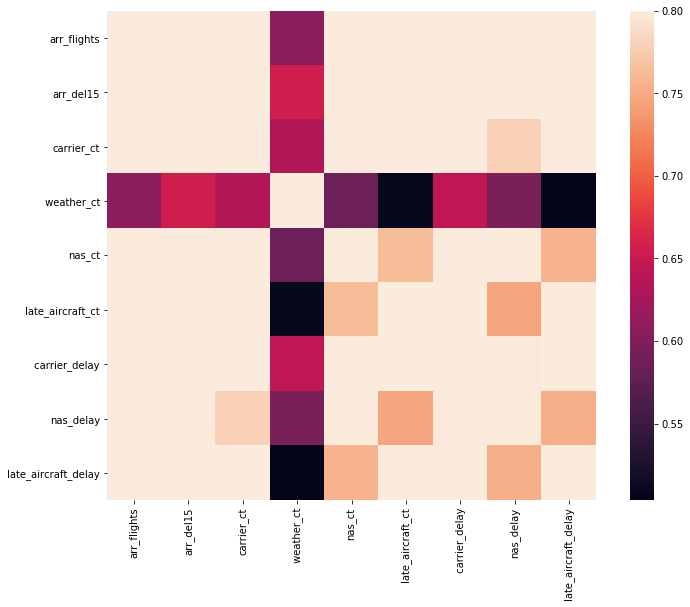

In [173]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = X.corr()
#print(corrmat)
# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [174]:
###### High multi-corrilation, applying PCA
# Standardizing the features
X = pd.DataFrame(StandardScaler().fit_transform(X))

pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [176]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [-0.1202288   0.02046367  0.43590677  0.06395293 -0.12007822 -0.16356794
  0.05832662  0.50356164  0.64296403]

Intercept: 
 7.89853170792

R-squared:
0.95789616018


In [179]:
cross_val_score(regr, X, y, cv=10)

array([ 0.9535356 ,  0.95096461,  0.95547833,  0.95298232,  0.95508333,
        0.96148875,  0.96067904,  0.96362718,  0.96214735,  0.95237115])

# Partial Least Squares Regression

In [185]:
planDelay_df2 = planDelay_df2.dropna()
planDelay_target = pd.DataFrame()
X = planDelay_df2.drop([' month', 'year', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_delay'], 1)

y = planDelay_df2['arr_delay']

In [189]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 9 dimensions.
pls1 = PLSRegression(n_components=9)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.95789616018


In [190]:
cross_val_score(pls1, X, y, cv=10)

array([ 0.9535356 ,  0.95096461,  0.95547833,  0.95298232,  0.95508333,
        0.96148875,  0.96067904,  0.96362718,  0.96214735,  0.95237115])